In [3]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score, mean_squared_error, mean_absolute_error, r2_score

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("winemag-data_first150k.csv")
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [6]:
df.describe()

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [7]:
#Creating a copy of data for processing
df2 = df.copy()
df2.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [8]:
df2.points.value_counts()

points
87     20747
88     17871
90     15973
86     15573
89     12921
85     12411
84     10708
91     10536
92      9241
83      6048
93      6017
82      4041
94      3462
95      1716
81      1502
80       898
96       695
97       365
98       131
99        50
100       24
Name: count, dtype: int64

In [9]:
df2.country.value_counts()

country
US                        62397
Italy                     23478
France                    21098
Spain                      8268
Chile                      5816
Argentina                  5631
Portugal                   5322
Australia                  4957
New Zealand                3320
Austria                    3057
Germany                    2452
South Africa               2258
Greece                      884
Israel                      630
Hungary                     231
Canada                      196
Romania                     139
Slovenia                     94
Uruguay                      92
Croatia                      89
Bulgaria                     77
Moldova                      71
Mexico                       63
Turkey                       52
Georgia                      43
Lebanon                      37
Cyprus                       31
Brazil                       25
Macedonia                    16
Serbia                       14
Morocco                      12


In [10]:
#Lets drop the "unamed", "description" and "designation" columns

In [11]:
df2 = df2.drop('description', axis=1)

In [12]:
df2 = df2.drop('designation', axis=1)

In [13]:
df2 = df2.drop('Unnamed: 0', axis=1)

In [14]:
df2.head()

,country,points,price,province,region_1,region_2,variety,winery
0,US,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [15]:
df2.region_1.value_counts()

region_1
Napa Valley                  6209
Columbia Valley (WA)         4975
Mendoza                      3586
Russian River Valley         3571
California                   3462
                             ... 
Alpilles                        1
Vin de Pays de Hauterive        1
Santa Barbara-Monterey          1
Sonoma County-Lake County       1
Coteaux du Tricastin            1
Name: count, Length: 1236, dtype: int64

In [16]:
df2.region_2.value_counts()

region_2
Central Coast              13057
Sonoma                     11258
Columbia Valley             9157
Napa                        8801
California Other            3516
Willamette Valley           3181
Mendocino/Lake Counties     2389
Sierra Foothills            1660
Napa-Sonoma                 1645
Finger Lakes                1510
Central Valley              1115
Long Island                  771
Southern Oregon              662
Oregon Other                 661
North Coast                  632
Washington Other             593
South Coast                  198
New York Other               147
Name: count, dtype: int64

In [17]:
#drop region 1 - there is too many and it does not bring any value

In [18]:
df2 = df2.drop('region_1', axis=1)

In [19]:
df2.head()

,country,points,price,province,region_2,variety,winery
0,US,96,235.0,California,Napa,Cabernet Sauvignon,Heitz
1,Spain,96,110.0,Northern Spain,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,96,90.0,California,Sonoma,Sauvignon Blanc,Macauley
3,US,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,95,66.0,Provence,NaN,Provence red blend,Domaine de la Bégude


<Axes: xlabel='points'>

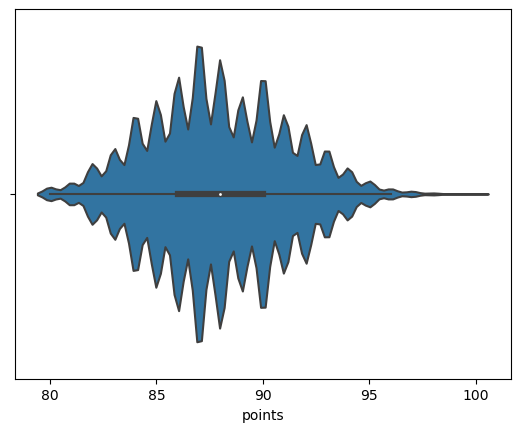

In [20]:
#Violin Plot for Points
sns.violinplot(x=df2["points"])

<Axes: xlabel='price'>

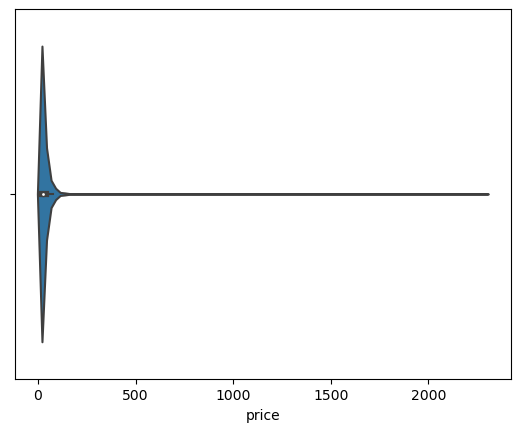

In [21]:
#Violin Plot for Price
sns.violinplot(x=df2["price"])

In [22]:
#make a plot - points per country
#import seaborn as sns
#import numpy as np

#sns.set_style("whitegrid")
#wine_points = sns.load_dataset("winemag-data_first150k")  # Replace "name_of_your_dataset" with the actual dataset name
#ax = sns.barplot(x="country", y="points", data=wine_points, estimator=np.mean)

In [23]:
df2['country'].value_counts().loc[df2['country'].value_counts()<100].index

Index(['Slovenia', 'Uruguay', 'Croatia', 'Bulgaria', 'Moldova', 'Mexico',
       'Turkey', 'Georgia', 'Lebanon', 'Cyprus', 'Brazil', 'Macedonia',
       'Serbia', 'Morocco', 'England', 'Luxembourg', 'Lithuania', 'India',
       'Czech Republic', 'Ukraine', 'Switzerland', 'South Korea',
       'Bosnia and Herzegovina', 'China', 'Egypt', 'Slovakia', 'Tunisia',
       'Albania', 'Montenegro', 'Japan', 'US-France'],
      dtype='object', name='country')

In [24]:
# Chose a cutoff value and created a list of application types to be replaced
countries_replaced = ['Slovenia', 'Uruguay', 'Croatia', 'Bulgaria', 'Moldova', 'Mexico',
       'Turkey', 'Georgia', 'Lebanon', 'Cyprus', 'Brazil', 'Macedonia',
       'Serbia', 'Morocco', 'England', 'Luxembourg', 'Lithuania', 'India',
       'Czech Republic', 'Ukraine', 'Switzerland', 'South Korea',
       'Bosnia and Herzegovina', 'China', 'Egypt', 'Slovakia', 'Tunisia',
       'Albania', 'Montenegro', 'Japan', 'US-France']

# Replace in dataframe
for app in countries_replaced:
    df2['country'] = df2['country'].replace(app,"Other")

# Check binning
df2['country'].value_counts()

country
US              62397
Italy           23478
France          21098
Spain            8268
Chile            5816
Argentina        5631
Portugal         5322
Australia        4957
New Zealand      3320
Austria          3057
Germany          2452
South Africa     2258
Greece            884
Other             791
Israel            630
Hungary           231
Canada            196
Romania           139
Name: count, dtype: int64

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   country   150925 non-null  object 
 1   points    150930 non-null  int64  
 2   price     137235 non-null  float64
 3   province  150925 non-null  object 
 4   region_2  60953 non-null   object 
 5   variety   150930 non-null  object 
 6   winery    150930 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 8.1+ MB


In [26]:
df2.groupby("country").points.describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Argentina,5631.0,85.996093,3.095287,80.0,84.0,86.0,88.0,97.0
Australia,4957.0,87.892475,2.977779,80.0,86.0,88.0,90.0,100.0
Austria,3057.0,89.276742,2.557063,81.0,88.0,89.0,91.0,98.0
Canada,196.0,88.239796,2.467979,82.0,87.0,88.5,90.0,93.0
Chile,5816.0,86.296768,2.701478,80.0,84.0,86.0,88.0,95.0
France,21098.0,88.925870,3.199695,80.0,87.0,89.0,91.0,100.0
Germany,2452.0,88.626427,2.928762,80.0,87.0,89.0,91.0,97.0
Greece,884.0,86.117647,2.060733,80.0,85.0,86.0,87.0,92.0
Hungary,231.0,87.329004,3.405236,80.0,84.5,87.0,90.0,96.0
